# Digital Filter Design using Deep Learning

We can see digital filters as some block box which we should find the parameters of it. In this notebook, we will use deep learning to find the parameters of a digital filter.

## Linear Algebra Review
First I will review some linear algebra concepts which we will use in this notebook.
In linear algebra we have different notations for vectors and matrices.
### Notations
In this notebook, I will use the following notations:

* $x$: element of a vector(scalar)
* $\mathbf{x}$: The vector
* $\mathbf{X}$: The matrix
* $\mathcal{X}$: The set which contains the elements of the vector or matrix and is a subset of $\mathbb{R}^n$ or $\mathbb{C}^n$

### Product of a vector and a matrix
If the vector $\mathbf{x}$ has $m_1$ elements, and the matrix $\mathbf{W}$ has $m_1$ rows and $m_2$ columns, we say that $\mathbf{x} \in \mathbb{R}^{m_1}$ and $\mathbf{W} \in \mathbb{R}^{m_1 \times m_2}$. the production of this vector and this matrix is defined as below:
$$ \mathbf{x_{1\times m_1}} \mathbf{M_{m_1 \times m_2}} = \mathbf{y_{1\times m_2}}$$
where $\mathbf{y} \in \mathbb{R}^{m_2}$.

### Matrix as a set of vectors
If we have $n$ vectors $\mathbf{x}_i \in \mathbb{R}^{m_1}$, we can define a matrix $\mathbf{X} \in \mathbb{R}^{n \times m_1}$ as below:
$$ \mathbf{X} = \begin{bmatrix} \mathbf{x}_1 \\ \mathbf{x}_2 \\ \vdots \\ \mathbf{x}_n \end{bmatrix}$$

The transpose of a matrix $\mathbf{X}$ is defined as below:
$$ \mathbf{X}^T = \begin{bmatrix} \mathbf{x}_1^T & \mathbf{x}_2^T & \cdots & \mathbf{x}_n^T \end{bmatrix}$$

The inverse of a matrix $\mathbf{X}$ is defined as below:
$$ \mathbf{X}^{-1} \mathbf{X} = \mathbf{I}$$

We call $\mathbf{X}$ a 2D tensor, and $\mathbf{x}$ a 1D tensor.

### Series of input signals
We can consider each vector as a input signal to a digital filter. The output of the filter is the production of the input signal and the filter parameters. We can consider the filter parameters as a matrix. So, the output of the filter is a vector.
the filter should behave correctly for all the input signals. So, we should tune the weights of the filter to have the correct output for all the input signals.

We assumed that the number of input signals is $n$ and the number of elements of each input signal is $m_1$. So, the input matrix is $\mathbf{X} \in \mathbb{R}^{n \times m_1}$. If we give all input signals to the system the output matrix is calculated as below:
$$ \mathbf{Y_{n \times m_2}} = \mathbf{X_{n \times m_1}} . \mathbf{W_{m_1 \times m_2}}$$

In our case the output matrix should have the same size as the input matrix. So, $m_2 = m_1$. So, the output matrix is $\mathbf{Y_{n \times m_1}}$. We can calculate the output matrix as below:
$$ \mathbf{Y_{n \times m_1}} = \mathbf{X_{n \times m_1}} . \mathbf{W_{m_1 \times m_1}}$$

### Non-linearities
To model a digital filter we cannot use a simple matrix multiplication. We should add some non-linearities to the system. So, we can use the following equation to model a digital filter:
$$ \mathbf{Y_{n \times m_1}} = \sigma(\mathbf{X_{n \times m_1}} . \mathbf{W_{m_1 \times m_1}})$$
where $\sigma$ is a non-linear function.

Still, we cannot use this equation to model a digital filter. Because the relation between the input and output of a digital filter is not a simple matrix multiplication which is a linear relation.
To illustrate this, we can consider $\mathbf{y_{new}} = \sigma^{-1}(\mathbf{y})$.
The relation between $\mathbf{X}$ and $\mathbf{y_{new}}$ is a linear relation. So, we didn't learn a non-linear relation between $\mathbf{X}$ and $\mathbf{y}$.

The input signals have been related to the system weights using a linear matrix multiplication. But, the output of the system is not a linear function of the system weights. So, we should insert some non-linearities between the system weights and the output of the system. So, we can use the following equation to model a digital filter:
$$ \mathbf{Y_{n \times m_1}} = \sigma(\sigma(\mathbf{X_{n \times m_1}} . \mathbf{W_1}_{m_1 \times m_2}) . \mathbf{W_2}_{m_2 \times m_1})$$
where $\mathbf{W_1}$ and $\mathbf{W_2}$ are the system weights and $\sigma$ is a non-linear function.

This is a simple neural network with one hidden layer. We can add more hidden layers to the system to have a more complex system. We should tune the system weights to have the correct output for all the input signals.
The general equation for a neural network with $L$ hidden layers is as below:
$$ \mathbf{Y_{n \times m_1}} = \sigma(\sigma(\cdots \sigma(\mathbf{X_{n \times m_1}} . \mathbf{W_1}_{m_1 \times m_2}) . \mathbf{W_2}_{m_2 \times m_3}) \cdots . \mathbf{W_L}_{m_L \times m_1})$$


## Loss Function
In practice, we cannot tune the system weights to have the correct output for all the input signals. So, we should find the system weights which have the minimum error for all the input signals. So, we should define a cost function to calculate the error of the system for all the input signals. We can use the following equation to calculate the cost function:
$$ \mathbf{J} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{Y_i} - \mathbf{\hat{Y}_i}$$
where $\mathbf{Y_i}$ is the output of the system for the $i$th input signal and $\mathbf{\hat{Y}_i}$ is the correct output of the system for the $i$-th input signal which we expect from the system.
This cost function cannot be used because the negative values of the error can cancel the positive values of the error. So, we should use absolute value of the error to calculate the cost function. So, we can use the following equation to calculate the cost function:
$$ \mathbf{J} = \frac{1}{n} \sum_{i=1}^{n} |\mathbf{Y_i} - \mathbf{\hat{Y}_i}|$$
We call this cost function mean absolute error (MAE).
This cost function is not differentiable for values of $\mathbf{Y_i} = \mathbf{\hat{Y}_i}$. So, we should use a differentiable function to calculate the cost function. We can use the following equation to calculate the cost function:
$$ \mathbf{J} = \frac{1}{n} \sum_{i=1}^{n} (\mathbf{Y_i} - \mathbf{\hat{Y}_i})^2$$
This cost function is called mean squared error (MSE).

There are lots of other cost functions which can be used to calculate the error of the system.

## Gradient Descent
We want to find the system weights which minimize the cost function. We can use gradient descent to find the extrema of the cost function.
* Some of the cost functions haven't minimum. So, we should prove that the cost function has a minimum. This is a hard problem. We should prove that the cost function has a minimum for all the possible input signals.
* Another problem is that the cost function can have local minimums. So, we should consider this problem in our algorithm and prevent the algorithm to be stuck in a local minimum. We use methods like stochastic gradient descent and mini-batch gradient descent to prevent the algorithm to be stuck in a local minimum.
Now, we should find the gradient of the cost function. We can use the following equation to calculate the gradient of the cost function:
$$ \nabla \mathbf{J} = \frac{1}{n} \sum_{i=1}^{n} \nabla (\mathbf{Y_i} - \mathbf{\hat{Y}_i})^2$$
In the right side of the equation, we have a summation of the gradients of the cost function for all the input signals. So, we can use the following equation to calculate the gradient of the cost function:
$$ \nabla \mathbf{J} = \frac{1}{n} \sum_{i=1}^{n} 2(\mathbf{Y_i} - \mathbf{\hat{Y}_i}) \nabla (\mathbf{Y_i} - \mathbf{\hat{Y}_i})$$
In the gradient part, the only parameter which is related to the weights of the system is $\mathbf{Y_i}$. So, we can use the following equation to calculate the gradient of the cost function:
$$ \nabla \mathbf{J} = \frac{2}{n} \sum_{i=1}^{n} (\mathbf{Y_i} - \mathbf{\hat{Y}_i}) \nabla \mathbf{Y_i}$$
To optimize the system weights, we should update the system weights using the following equation:
$$ \mathbf{W} = \mathbf{W} - \alpha \nabla \mathbf{J}$$
where $\alpha$ is the learning rate.
The learning rate is a hyperparameter of the system. We should tune the learning rate to have a good performance for the system.
The dimension of the gradient of the cost function is the same as the dimension of the system weights. So, we can use the following equation to update the system weights:
$$ \mathbf{W} = \mathbf{W} - \alpha \frac{2}{n} \sum_{i=1}^{n} (\mathbf{Y_i} - \mathbf{\hat{Y}_i}) \nabla \mathbf{Y_i}$$
There isn't just one weight matrix in the system. We have different weight matrices in the system. So, we should update all the weight matrices using the following equation:
$$ \mathbf{W_i} = \mathbf{W_i} - \alpha \frac{2}{n} \sum_{k=1}^{n} (\mathbf{Y_k} - \mathbf{\hat{Y}_k}) {\nabla}_{\mathbf{W_i}} \mathbf{Y_k}$$
where $i$ is the index of the weight matrix.
The term ${\nabla}_{\mathbf{W_i}} \mathbf{Y_k}$ is the gradient of the output of the system with respect to the system weights. The dimension of the gradient of the output of the system with respect to the system weights is the same as the dimension of the system weights. Because calculate the gradient of the output of the system with respect to the system weights, we should calculate the gradient of the output of the system with respect to each element of the system weights. So, the dimension of the gradient of the output of the system with respect to the system weights is the same as the dimension of the system weights.
For an arbitrary loss function $\mathbf{J}$, we can use the chain rule to calculate the gradient of the output of the system with respect to the system weights. So, we can use the following equation to calculate the gradient of the loss function with respect to the system weights:
$$ {\nabla}_{\mathbf{W_i}} \mathbf{J} = \frac{\partial \mathbf{J}}{\partial \mathbf{Y}} {\nabla}_{\mathbf{W_i}} \mathbf{Y}$$
where $\frac{\partial \mathbf{J}}{\partial \mathbf{Y}}$ is the gradient of the loss function with respect to the output of the system and ${\nabla}_{\mathbf{W_i}} \mathbf{Y}$ is the gradient of the output of the system with respect to the system weights.
### Backpropagation
We should calculate the gradient of the loss function with respect to the system weights to update the system weights. We can use the chain rule to calculate the gradient of the loss function with respect to the system weights. This method is called backpropagation.
If we have a neural network with $L$ hidden layers, we can use the following equation to calculate the gradient of the loss function with respect to the system weights:
$$ {\nabla}_{\mathbf{W_i}} \mathbf{J} = \frac{\partial \mathbf{J}}{\partial \mathbf{Y}} \frac{\partial \mathbf{Y}}{\partial \mathbf{Y_{L-1}}} \frac{\partial \mathbf{Y_{L-1}}}{\partial \mathbf{Y_{L-2}}} \cdots \frac{\partial \mathbf{Y_{i+1}}}{\partial \mathbf{Y_i}} {\nabla}_{\mathbf{W_i}} \mathbf{Y_i}$$
where $\frac{\partial \mathbf{J}}{\partial \mathbf{Y}}$ is the gradient of the loss function with respect to the output of the system and $\frac{\partial \mathbf{Y}}{\partial \mathbf{Y_{L-1}}}$, $\frac{\partial \mathbf{Y_{L-1}}}{\partial \mathbf{Y_{L-2}}}$, $\cdots$, $\frac{\partial \mathbf{Y_{i+1}}}{\partial \mathbf{Y_i}}$ are the gradients of the output of the system with respect to the output of the previous layer.
$\frac{\partial \mathbf{Y_{i}}}{\partial \mathbf{W_i}}$ is the gradient of the $i$-th layer with respect to the $i$-th layer weights. So, we can use the following equation to calculate the gradient of the $i$-th layer with respect to the $i$-th layer weights:

$$ {\nabla}_{\mathbf{W_i}} \mathbf{Y_i} = \frac{\partial \mathbf{Y_i}}{\partial \mathbf{W_i}}$$


### Stochastic Gradient Descent
As I mentioned earlier, to prevent the algorithm to be stuck in a local minimum, we should use methods like stochastic gradient descent and mini-batch gradient descent. In stochastic gradient descent, we use just one input signal to update the system weights. So, we can use the following equation to update the system weights:
$$ \mathbf{W_i} = \mathbf{W_i} - \alpha \frac{2}{n} (\mathbf{Y} - \mathbf{\hat{Y}}) {\nabla}_{\mathbf{W_i}} \mathbf{Y}$$
where $\mathbf{Y}$ is the output of the system for the input signal and $\mathbf{\hat{Y}}$ is the correct output of the system for the input signal which we expect from the system. We choose the input signal randomly.
### Mini-batch Gradient Descent
In mini-batch gradient descent, we use a batch of input signals to update the system weights. So, we can use the following equation to update the system weights:
$$ \mathbf{W_i} = \mathbf{W_i} - \alpha \frac{2}{n} \sum_{k=1}^{b} (\mathbf{Y_k} - \mathbf{\hat{Y}_k}) {\nabla}_{\mathbf{W_i}} \mathbf{Y_k}$$
where $b$ is the batch size and $b \leq n$.
Mini-batch gradient descent is a trade-off between stochastic gradient descent and batch gradient descent. In stochastic gradient descent, we use just one input signal to update the system weights. So, we have a noisy gradient. In batch gradient descent, we use all the input signals to update the system weights. So, we have a smooth gradient. In mini-batch gradient descent, we use a batch of input signals to update the system weights. So, we have a gradient which is smoother than stochastic gradient descent and noisier than batch gradient descent.


## Training, Validation, and Test Sets
* We should split the input signals to training, validation, and test sets.
* We use the training set to update the system weights. Trainig set is the set which we use to train the
system.
* We use the validation set to tune the hyperparameters of the system. Hyperparameters are the parameters of the system which we should tune them. For example, the learning rate is a hyperparameter of the system. Validation set is the set which we use to validate the system. We monitor the performance of the system on the validation set. If the performance of the system on the validation set is not good, we tune the hyperparameters of the system and train the system again.
* We use the test set to evaluate the performance of the system. Test set is the set which we use to test the system. We use the test set just once. We don't tune the hyperparameters of the system using the test set. Because if we tune the hyperparameters of the system using the test set, we will overfit the system to the test set. So, the performance of the system on the test set will be better than the performance of the system on the real world general data.
* Before splitting the input signals to training, validation, and test sets, we should shuffle the input signals. Bacause if the input signals are not shuffled, the model will be biased to the order of the input signals. Also the model will forget the first input signals and will be biased to the last input signals.

## Overfitting
Overfitting is a common problem in machine learning. Overfitting happens when the model is too complex for the data. So, the model learns the noise of the data. So, the model has a good performance on the training set but has a bad performance on the validation set. We can use the following methods to prevent overfitting:
* Simple model
* Regularization
* Dropout
* Early stopping
* Data augmentation
* Batch normalization


## Create the Dataset
* We should create the dataset for the system. We consider a digital low-pass filter which passes the frequencies lower than $f_c$ and rejects the frequencies higher than $f_c$.
* We consider the sampling frequency of the system as $f_s$. So, the normalized cutoff frequency is $f_c/f_s$.
* We consider the order of the filter as $N$. So, the number of the system weights is $N+1$.
* We consider the number of the input signals as $n$.
* We consider the number of the elements of each input signal as $m$. So, the input matrix is $\mathbf{X} \in \mathbb{R}^{n \times m}$.
* We consider the number of the elements of each output signal as $m$. So, the output matrix is $\mathbf{Y} \in \mathbb{R}^{n \times m}$.
* We consider the input signals as summation of siusoids with different frequencies plus some noise. So, the input signals are as below:
$$ \mathbf{X} = \mathbf{X_{sin}} + \mathbf{X_{noise}}$$
where $\mathbf{X_{sin}}$ is the input matrix which contains the sinusoids and $\mathbf{X_{noise}}$ is the input matrix which contains the noise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
fs = 1e3; # Sampling frequency
fc = 100; # Cut-off frequency
t = np.arange(0, 1,1/fs) # Time vector
input_freq_range = np.arange(0, 500, 1) # Frequency range

def generate_sine_data(input_freq_range, fc, t):
    """
    Generate sine wave data with cut-off frequency fc.
    Args:
        input_freq_range: Input frequency range
        fc: Cut-off frequency
        t: Time vector
    Returns:
        X: Input signal
        Y: Output signal
    """
    X = np.array([np.cos(2*np.pi*f0*t) for f0 in input_freq_range]) # Input signal
    Y = np.zeros((len(input_freq_range), len(t))) # Output signal
    passed_freq_range = input_freq_range[input_freq_range < fc]
    Y [passed_freq_range, :] = X[passed_freq_range, :]
    return X, Y

X, Y = generate_sine_data(input_freq_range, fc, t)


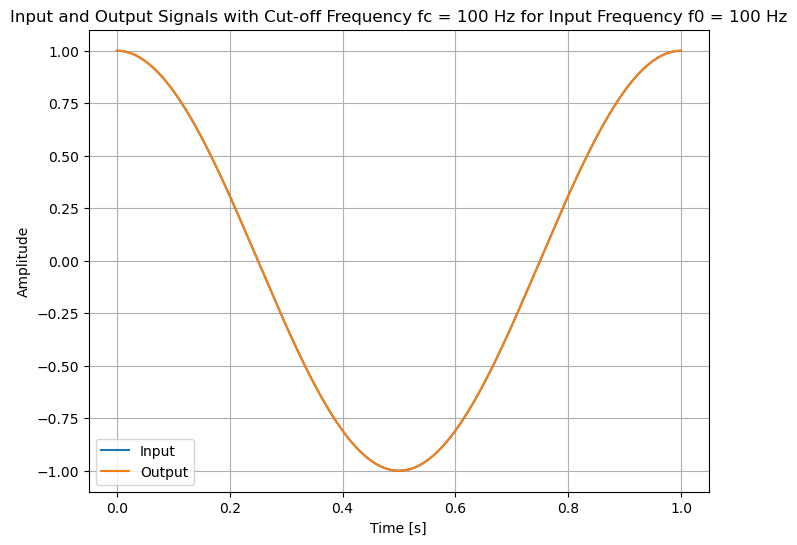

In [26]:
fig = plt.figure(num='Test the generate_sine_data function', figsize=(8, 6))
plt.plot(t, X[1, :], label='Input')
plt.plot(t, Y[1, :], label='Output')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Input and Output Signals with Cut-off Frequency fc = 100 Hz for Input Frequency f0 = 100 Hz')
plt.legend()
plt.grid()
plt.show()


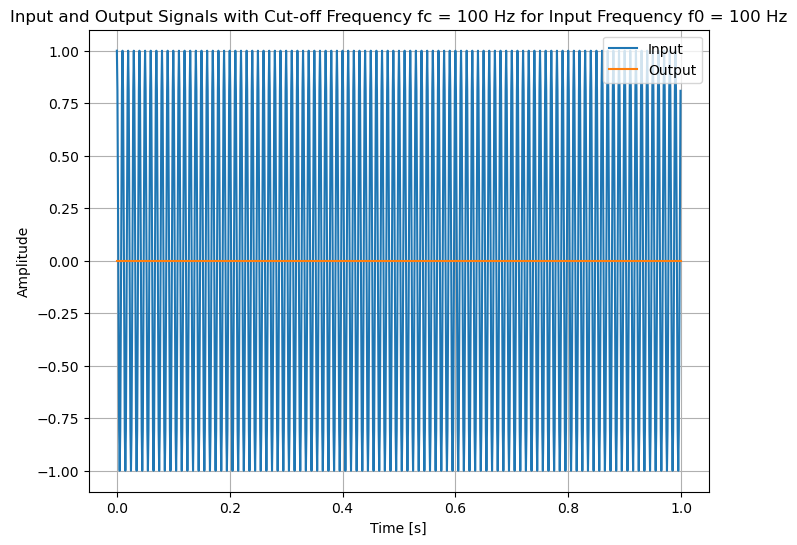

In [27]:
fig = plt.figure(num='Test the generate_sine_data function', figsize=(8, 6))
plt.plot(t, X[100, :], label='Input')
plt.plot(t, Y[100, :], label='Output')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Input and Output Signals with Cut-off Frequency fc = 100 Hz for Input Frequency f0 = 100 Hz')
plt.legend()
plt.grid()
plt.show()
